Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics

Loading raw Data

In [2]:
data=pd.read_csv("car_age_price.csv")

Inspecting the data

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
#Data statistical distribution
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [7]:
#Checking for missing values
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [9]:
data['Year'].nunique()

8

In [10]:
data['Price'].nunique()

35

In [11]:
#Correlation of data
corr=data.corr()
corr

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<AxesSubplot:>

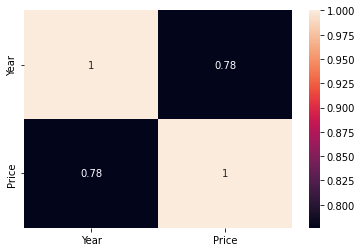

In [12]:
sns.heatmap(corr,annot=True)

Visualizing the data

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

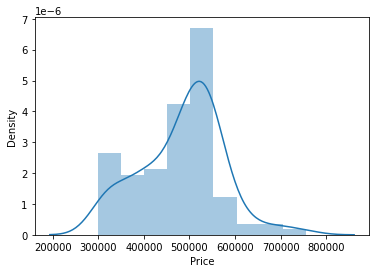

In [13]:
sns.distplot(data['Price'])

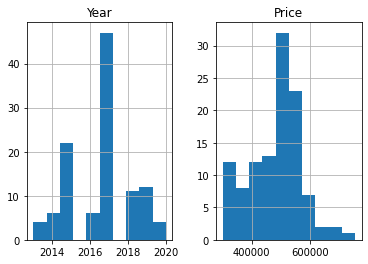

In [14]:
freqgraph=data.select_dtypes(include=['int'])
freqgraph.hist()
plt.show()

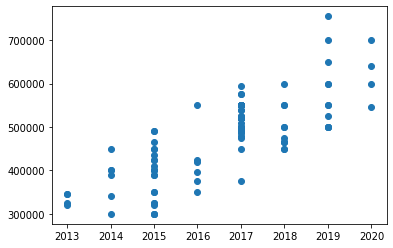

In [15]:
plt.scatter(data['Year'],data['Price'])

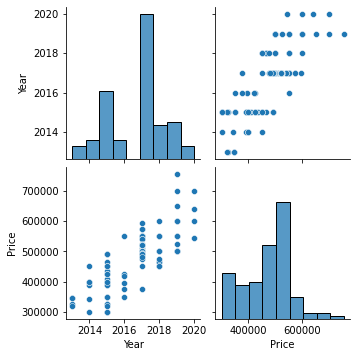

In [17]:
sns.pairplot(data)
plt.show()

Checking for Outliers

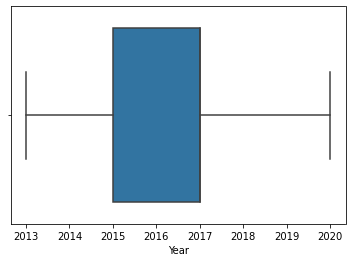

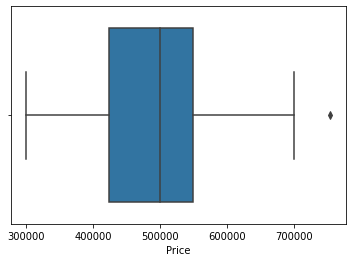

In [19]:
#with boxplot
for i in data:
    sns.boxplot(x=data[i])
    plt.show()

In [22]:
#Finding Outlier using IQR
IQR=stats.iqr(data.Price,interpolation='midpoint')
IQR

127500.0

In [23]:
Q1=data.Price.quantile(0.25)
Q3=data.Price.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(232500.0, 741250.0)

In [24]:
#located outlier
data.loc[data.Price>max_limit]

,Year,Price
1,2019,755000


In [25]:
data.loc[data.Price<min_limit]

,Year,Price


In [ ]:
# data.loc[data['Price']>max_limit,'Price']=np.median(data.Price)

**Linear Regression Model**

In [26]:
#Declaring Target and Predictor

In [27]:
y=data['Price']
x=data.drop(['Price'],axis=1)

In [28]:
x.shape

(112, 1)

In [29]:
y.shape

(112,)

Train test split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [32]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [33]:
model=lr.fit(x_train,y_train)

<AxesSubplot:title={'center':'Correlation b/w Price and Year'}, xlabel='Year', ylabel='Price'>

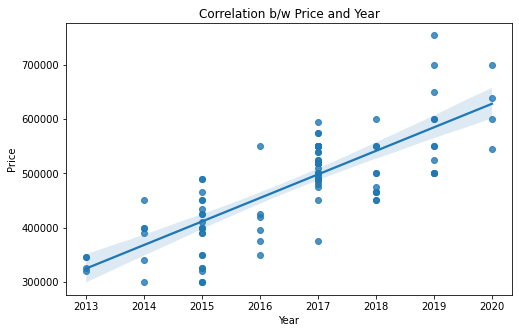

In [35]:
fig=plt.figure(figsize=(8,5))
plt.title("Correlation b/w Price and Year")
sns.regplot(x='Year',y='Price',data=data)

In [36]:
y_pred=model.predict(x_test)

In [ ]:
#Checking metrics for quality of model

In [37]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('MSE is:',mean_squared_error(y_test,y_pred))
print('MAE  is:',mean_absolute_error(y_test, y_pred))
print('R2 is:',r2_score(y_test,y_pred))

MSE is: 4326906256.829671
MAE  is: 53534.77957001264
R2 is: 0.36759313425902185


Comparing Test data and Predicted data

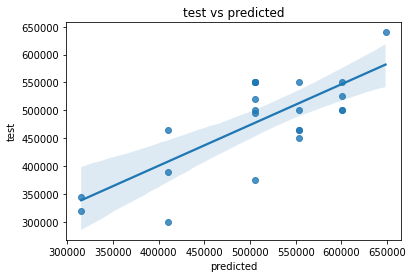

In [39]:
#pred vs test
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("predicted")
plt.ylabel("test")
plt.title("test vs predicted")
plt.show()

In [40]:
y_pred

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [41]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [42]:
#Predicted price for 2022
new_data=np.array([[2022]])
predicted_price=lr.predict(new_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
print("The Price predicted for a 2022 model Hyundai grand i10:", predicted_price[0])

The Price predicted for a 2022 model Hyundai grand i10: 743601.6159450412


In [44]:
#Finding the model with random state of TrainTestSplit where the model gives almost 0.9 as R2 score


In [45]:
scores=[]
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=i)
    lr=linear_model.LinearRegression()
    model=lr.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    scores.append(r2_score(y_test,y_pred))

In [46]:
np.argmax(scores)

673

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=np.argmax(scores))
lr1=linear_model.LinearRegression()
model1=lr1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
r2_score(y_test,y_pred1)

0.8994191259835941

In [48]:
#New metrics
print('MSE is:',mean_squared_error(y_test,y_pred1))
print('MAE  is:',mean_absolute_error(y_test, y_pred1))
print('R2 is:',r2_score(y_test,y_pred1))

MSE is: 826020427.8597339
MAE  is: 22674.405987990398
R2 is: 0.8994191259835941


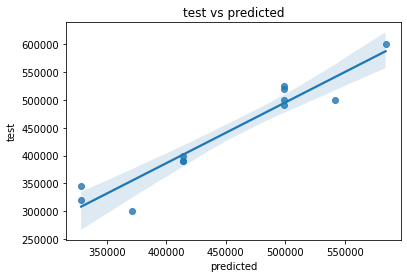

In [50]:
#pred1 vs test
sns.regplot(x=y_pred1,y=y_test)
plt.xlabel("predicted")
plt.ylabel("test")
plt.title("test vs predicted")
plt.show()

In [59]:
#Predicted price for 2022 model at best Random state
newdata=np.array([[2022]])
pred_price1=lr1.predict(newdata)
pred_price1[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


711798.0796848685

Lasso Regression Model

In [52]:
Lass_modl=linear_model.Lasso()

In [53]:
Lass_modl.fit(x_train,y_train)

Lasso()

In [54]:
y_pred2=Lass_modl.predict(x_test)

In [55]:
#Metrics with Lasso regression model
print('MSE is:',mean_squared_error(y_test,y_pred2))
print('MAE  is:',mean_absolute_error(y_test, y_pred2))
print('R2 is:',r2_score(y_test,y_pred2))

MSE is: 826038894.4377881
MAE  is: 22674.7321953699
R2 is: 0.8994168773896148


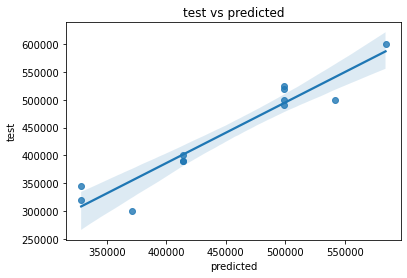

In [56]:
#pred2 vs test
sns.regplot(x=y_pred2,y=y_test)
plt.xlabel("predicted")
plt.ylabel("test")
plt.title("test vs predicted")
plt.show()

In [58]:
#2022 car price predicted with lasso model
newdata1=np.array([[2022]])
pred_price2=Lass_modl.predict(newdata1)
pred_price2[0]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


711795.9336916804